In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_excel("mental_health_dataset.xlsx")
df.head()

,age,sex,hospital_center_id,condition,condition_type,bdi_ii_baseline,bdi_ii_after_intervention_12w,bdi_ii_follow_up_24w,mindfulness_therapies_started,mindfulness_therapies_completed
0,78.0,female,1,Cancer,Breast,10.0,3.0,7.0,14,13
1,70.0,female,1,Cancer,Breast,4.0,4.0,8.0,14,12
2,75.0,female,1,Cancer,Breast,18.0,10.0,13.0,4,4
3,73.0,female,1,Cancer,Breast,11.0,NaN,NaN,0,0
4,62.0,female,1,Cancer,Breast,5.0,11.0,20.0,12,7


In [3]:
df.columns

Index(['age', 'sex', 'hospital_center_id', 'condition', 'condition_type',
       'bdi_ii_baseline', 'bdi_ii_after_intervention_12w',
       'bdi_ii_follow_up_24w', 'mindfulness_therapies_started',
       'mindfulness_therapies_completed'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              209 non-null    float64
 1   sex                              210 non-null    object 
 2   hospital_center_id               210 non-null    int64  
 3   condition                        210 non-null    object 
 4   condition_type                   209 non-null    object 
 5   bdi_ii_baseline                  209 non-null    float64
 6   bdi_ii_after_intervention_12w    167 non-null    float64
 7   bdi_ii_follow_up_24w             166 non-null    float64
 8   mindfulness_therapies_started    210 non-null    int64  
 9   mindfulness_therapies_completed  210 non-null    int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 16.5+ KB


In [5]:
df.isnull().sum()

age                                 1
sex                                 0
hospital_center_id                  0
condition                           0
condition_type                      1
bdi_ii_baseline                     1
bdi_ii_after_intervention_12w      43
bdi_ii_follow_up_24w               44
mindfulness_therapies_started       0
mindfulness_therapies_completed     0
dtype: int64

In [6]:
df.describe(include='all')

,age,sex,hospital_center_id,condition,condition_type,bdi_ii_baseline,bdi_ii_after_intervention_12w,bdi_ii_follow_up_24w,mindfulness_therapies_started,mindfulness_therapies_completed
count,209.000000,210,210.000000,210,209,209.000000,167.000000,166.000000,210.000000,210.000000
unique,NaN,2,NaN,4,7,NaN,NaN,NaN,NaN,NaN
top,NaN,male,NaN,Cancer,Breast,NaN,NaN,NaN,NaN,NaN
freq,NaN,119,NaN,127,78,NaN,NaN,NaN,NaN,NaN
mean,65.220096,NaN,1.576190,NaN,NaN,11.167464,7.479042,6.716867,25.109524,21.604762
std,11.179453,NaN,0.867491,NaN,NaN,8.459502,7.271697,7.335961,32.703575,30.242259
min,25.000000,NaN,1.000000,NaN,NaN,0.000000,0.000000,-1.000000,0.000000,0.000000
25%,58.000000,NaN,1.000000,NaN,NaN,5.000000,2.000000,2.000000,2.000000,0.250000
50%,67.000000,NaN,1.000000,NaN,NaN,10.000000,6.000000,5.000000,9.500000,7.000000
75%,73.000000,NaN,2.750000,NaN,NaN,15.000000,11.000000,9.000000,35.500000,32.500000


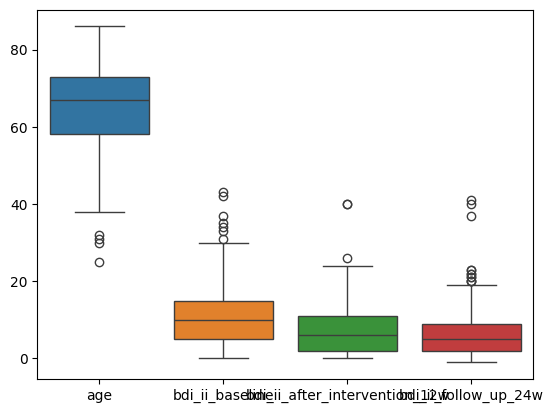

In [ ]:
#  Outlier detection 

sns.boxplot(data=df[['age','bdi_ii_baseline', 'bdi_ii_after_intervention_12w', 'bdi_ii_follow_up_24w']])
plt.show()

# Cap outliers (IQR method)
Q1 = df['bdi_ii_baseline'].quantile(0.25)
Q3 = df['bdi_ii_baseline'].quantile(0.75)

IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
